# Exercise 1  Cereals Data Set: Use the prepared or preprocessed data to answer the following
### Abeer Sethia | 220968144 | Batch B1 | Week 4 | Exercise 1
1. Cross tabulate the type of cereal (hot vs cold) against the manufacturer
2. Which is the cereal with the best rating, worst rating?
3. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals. 
4. Is there a relation between sugars, calories, carbs, and fat?
5. Which manufacturers produce cereal with highest calories?
6. Use correlation tests and visualization to identify if the two variables calories and 
consumer rating associated?
7. Use correlation tests and visualization to identify if the two variables shelf and 
consumer rating associated? 
8. Is there a relation between manufacturer and rating?
9. Which nutrients are essential for a good rating for a cereal?
10. Design a Linear regression model to predict the rating of a cereal based on top 3 
related nutrients. Tabulate the accuracy of the model using an 80, 20 split

### Importing the libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

### Importing and printing the dataset

In [14]:
df=pd.read_excel("Cereals1.xls")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [15]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


### 1. Cross tabulate the type of cereal (hot vs cold) against the manufacturer

In [5]:
pd.crosstab(df.type,df.type)

type,C,H
type,,
C,73,0
H,0,3


### 2. Which is the cereal with the best rating, worst rating?

In [6]:
print("The cereal with the best rating is: ")
df[df.rating==df.rating.max()].name

The cereal with the best rating is: 


2    All-Bran_with_Extra_Fiber
Name: name, dtype: object

In [7]:
print("The cereal with the worst rating is: ")
df[df.rating==df.rating.min()].name


The cereal with the worst rating is: 


9    Cap'n'Crunch
Name: name, dtype: object

### 3. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals.

<AxesSubplot:xlabel='rating', ylabel='type'>

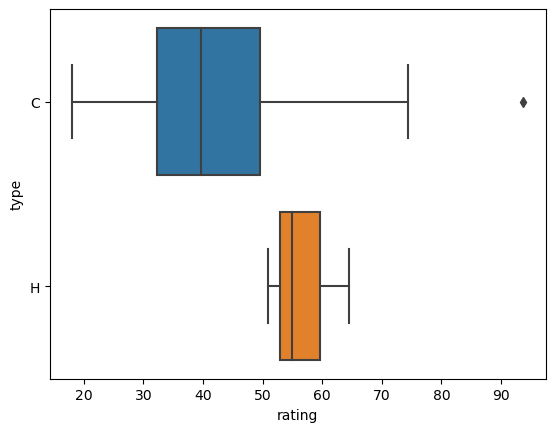

In [8]:
sns.boxplot(x='rating',y='type',data=df)

### 4. Is there a relation between sugars, calories, carbs, and fat?

In [9]:
df[['sugars','calories','fat','carbo']].corr()

,sugars,calories,fat,carbo
sugars,1.000000,0.571072,0.270861,-0.349902
calories,0.571072,1.000000,0.510630,0.205913
fat,0.270861,0.510630,1.000000,-0.329676
carbo,-0.349902,0.205913,-0.329676,1.000000


### 5. Which manufacturers produce cereal with highest calories?

In [10]:
df[df.calories==df.calories.max()].mfr

45    K
Name: mfr, dtype: object

### 6. Use correlation tests and visualization to identify if the two variables calories and consumer rating are associated?

In [11]:
df[['rating','calories']].corr()

,rating,calories
rating,1.000000,-0.674336
calories,-0.674336,1.000000


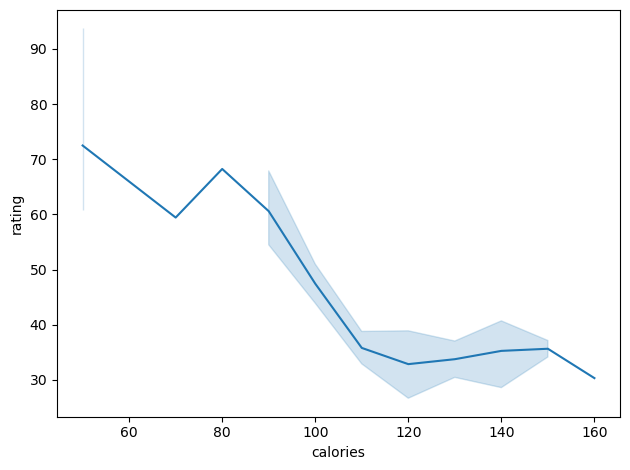

In [16]:
sns.lineplot(data=df, x="calories", y="rating")
plt.tight_layout()

<AxesSubplot:xlabel='rating', ylabel='calories'>

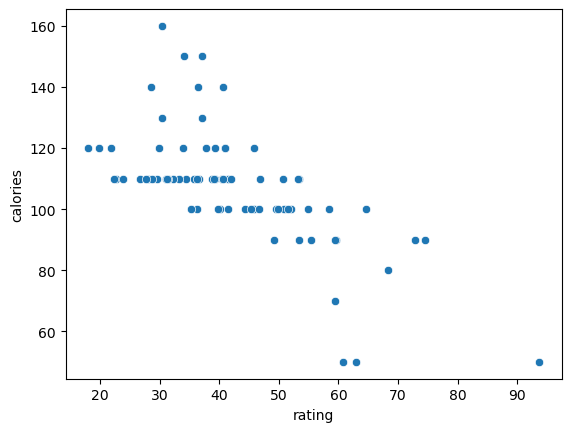

In [12]:
sns.scatterplot(x='rating', y='calories', data= df)

### 7. Use correlation tests and visualization to identify if the two variables shelf and consumer rating associated?

In [26]:
df[['shelf','rating']].corr()

,shelf,rating
shelf,1.000000,0.001973
rating,0.001973,1.000000


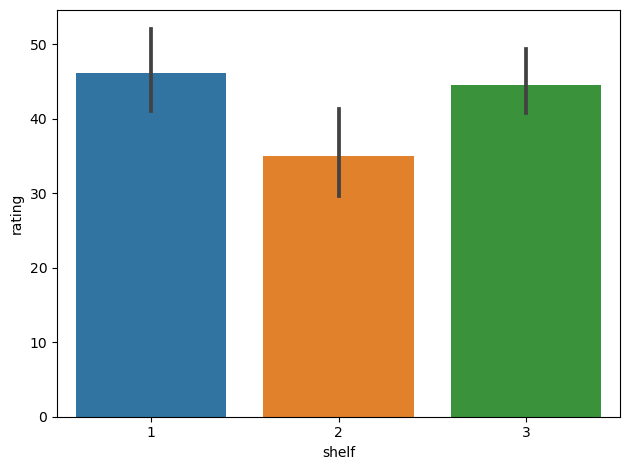

In [18]:
sns.barplot(x='shelf',y='rating',data=df)
plt.tight_layout()